# Εργασία στο Μάθημα Αναγνώριση Προτύπων - Μέρη Α, Β, Γ
## Ονοματεπώνυμα Φοιτητών:
 

### Μέρος Α

First we have to load the data from the CSV file and split them into training and testing with 50/50 chance. 

We convert our data into a NumpPy array so it is easier to perform operations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split

# Load the data from CSV
data = pd.read_csv(r"D:\projects\Pattern-Recognition\dataset.csv", header=None)
data = data.values  # Convert DataFrame to NumPy array

#printing the data
print(data)

# Split the data into features (X) and labels (y)
X = data[:, :-1]
y = data[:, -1]

# Split the data into training and test sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


[[ 1.8036    4.4229    3.      ]
 [ 3.4615    4.1436    2.      ]
 [ 2.1873    3.9964    1.      ]
 [ 3.0933    2.9056    1.      ]
 [ 1.7586    2.4109    1.      ]
 [ 1.3935    3.3955    3.      ]
 [-0.25885  -0.30159   1.      ]
 [ 7.1342    4.0605    1.      ]
 [ 3.1281    3.4291    2.      ]
 [ 5.7726    0.95443   2.      ]
 [ 1.6966    2.3042    1.      ]
 [ 4.5855    6.8982    1.      ]
 [ 1.9932    3.8719    1.      ]
 [ 1.8076    1.4564    1.      ]
 [ 2.5472    5.1554    3.      ]
 [ 4.9085    3.5222    2.      ]
 [ 4.8933    3.7063    1.      ]
 [ 0.85293   0.56615   1.      ]
 [ 2.1049    2.9689    1.      ]
 [ 3.1312    3.5776    2.      ]
 [ 1.2831    3.6174    3.      ]
 [-0.64185   4.9521    3.      ]
 [ 6.1643    5.7793    1.      ]
 [ 0.79251   1.9034    1.      ]
 [ 5.131     3.2936    2.      ]
 [ 3.9074    4.0554    2.      ]
 [ 6.044     1.5146    2.      ]
 [ 5.9782    5.8386    1.      ]
 [ 4.8381    3.1233    2.      ]
 [ 0.92854   5.4136    3.      ]
 [ 1.561  

We define our naive bayes function that uses common covariance for each of the 3 classes. 

We calculate the mean of each column for class and the covariance matrix for the entire dataset X.

We also calculate the prior probability for each unique class in y.

In [ ]:
def fit_naive_bayes(X, y):
    class_means = [np.mean(X[y == c], axis=0) for c in np.unique(y)]
    common_covariance = np.cov(X, rowvar=False)
    class_priors = [np.mean(y == c) for c in np.unique(y)]
    return class_means, common_covariance, class_priors

Now we define a function that makes predictions using a trained Naive Bayes classifier.

In [ ]:
def predict_naive_bayes(X, class_means, common_covariance, class_priors):
    predictions = []
    for l in X:
         # For each class, calculate the likelihood of the sample
        likelihoods = [multivariate_normal.pdf(l, mean=mean, cov=common_covariance) for mean in class_means]
        
        # Calculate the posterior probability for each class
        posteriors = [likelihood * prior for likelihood, prior in zip(likelihoods, class_priors)]

        # Select the class with the highest posterior probability as the predicted class
        predictions.append(np.argmax(posteriors) + 1)
    return np.array(predictions)

In [6]:
# Train the Naive Bayes classifier
class_means, common_covariance, class_priors = fit_naive_bayes(X_train, y_train)

# Make predictions on the test set
y_pred = predict_naive_bayes(X_test, class_means, common_covariance, class_priors)

# Plot the test data with misclassifications highlighted
plt.scatter(X_test[y_test == y_pred, 0], X_test[y_test == y_pred, 1], c='green', marker='x', label='Correctly Classified')
plt.scatter(X_test[y_test != y_pred, 0], X_test[y_test != y_pred, 1], c='red', marker='x', label='Misclassified')

# Plot decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = predict_naive_bayes(np.c_[xx.ravel(), yy.ravel()], class_means, common_covariance, class_priors)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, levels=[0, 1, 2, 3], colors=['blue', 'orange', 'purple'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Naive Bayes Classifier with Common Covariance Matrix')
plt.legend()
plt.show()

# Calculate the average classification error
classification_error = np.mean(y_test != y_pred)
print(f'Average Classification Error: {classification_error:.2%}')


In [ ]:
print(f'the class mean is: {class_means}')
print('----------------')
print(f'The common covariance is: {common_covariance}')
print('----------------')
print(f'The class priors is: {class_priors}')


the class mean is: [array([2.72190321, 3.15072496]), array([4.54909487, 3.0332359 ]), array([1.04870183, 5.11158333])]
----------------
The common covariance is: [[ 3.97745455 -0.23837744]
 [-0.23837744  3.22683231]]
----------------
The class priors is: [0.37857142857142856, 0.2785714285714286, 0.34285714285714286]


IndexError: index 280 is out of bounds for axis 0 with size 280

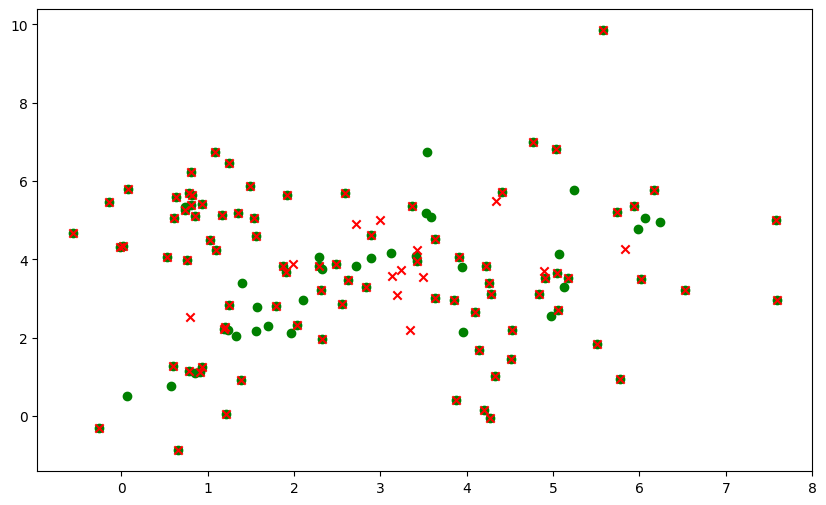

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split

# Define Naive Bayes classifier functions with different covariance matrices
def fit_naive_bayes_different_covariance(X, y):
    class_means = [np.mean(X[y == c], axis=0) for c in np.unique(y)]
    class_covariances = [np.cov(X[y == c], rowvar=False) for c in np.unique(y)]
    class_priors = [np.mean(y == c) for c in np.unique(y)]
    return class_means, class_covariances, class_priors

def predict_naive_bayes_different_covariance(X, class_means, class_covariances, class_priors):
    predictions = []
    misclassified_indices = []
    for i, x in enumerate(X):
        likelihoods = [multivariate_normal.pdf(x, mean=mean, cov=covariance) for mean, covariance in zip(class_means, class_covariances)]
        posteriors = [likelihood * prior for likelihood, prior in zip(likelihoods, class_priors)]
        predicted_class = np.argmax(posteriors) + 1
        predictions.append(predicted_class)
        if predicted_class != y[i]:
            misclassified_indices.append(i)
    
    return np.array(predictions), misclassified_indices

# Train the Naive Bayes classifier with different covariance matrices
class_means_diff_covariance, class_covariances_diff, class_priors_diff = fit_naive_bayes_different_covariance(X_train, y_train)

# Make predictions on the test set
y_pred_diff_covariance, misclassified_indices = predict_naive_bayes_different_covariance(X_test, class_means_diff_covariance, class_covariances_diff, class_priors_diff)

# Plotting
plt.figure(figsize=(10, 6))

# Plot correctly classified points
plt.scatter(X_test[y_test == y_pred_diff_covariance, 0], X_test[y_test == y_pred_diff_covariance, 1], c='green', marker='o', label='Correct')

# Plot misclassified points with a different color and marker
misclassified_X_test = X_test[misclassified_indices]
plt.scatter(misclassified_X_test[:, 0], misclassified_X_test[:, 1], c='red', marker='x', label='Misclassified')

# Plot decision regions
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = predict_naive_bayes_different_covariance(np.c_[xx.ravel(), yy.ravel()], class_means_diff_covariance, class_covariances_diff, class_priors_diff)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, levels=[0, 1, 2, 3], colors=['blue', 'orange', 'purple'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Naive Bayes Classifier with Different Covariance Matrices')
plt.legend()
plt.show()

# Calculate the average classification error
classification_error = np.mean(y_test != y_pred_diff_covariance)
print(f'Average Classification Error: {classification_error:.2%}')
